In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
import os

In [3]:
# Load the data
file_path = "C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Análises/PIB Municipal/PIB Mesorregional.xlsx"
gdp_data = pd.read_excel(file_path, sheet_name="Graph 1")

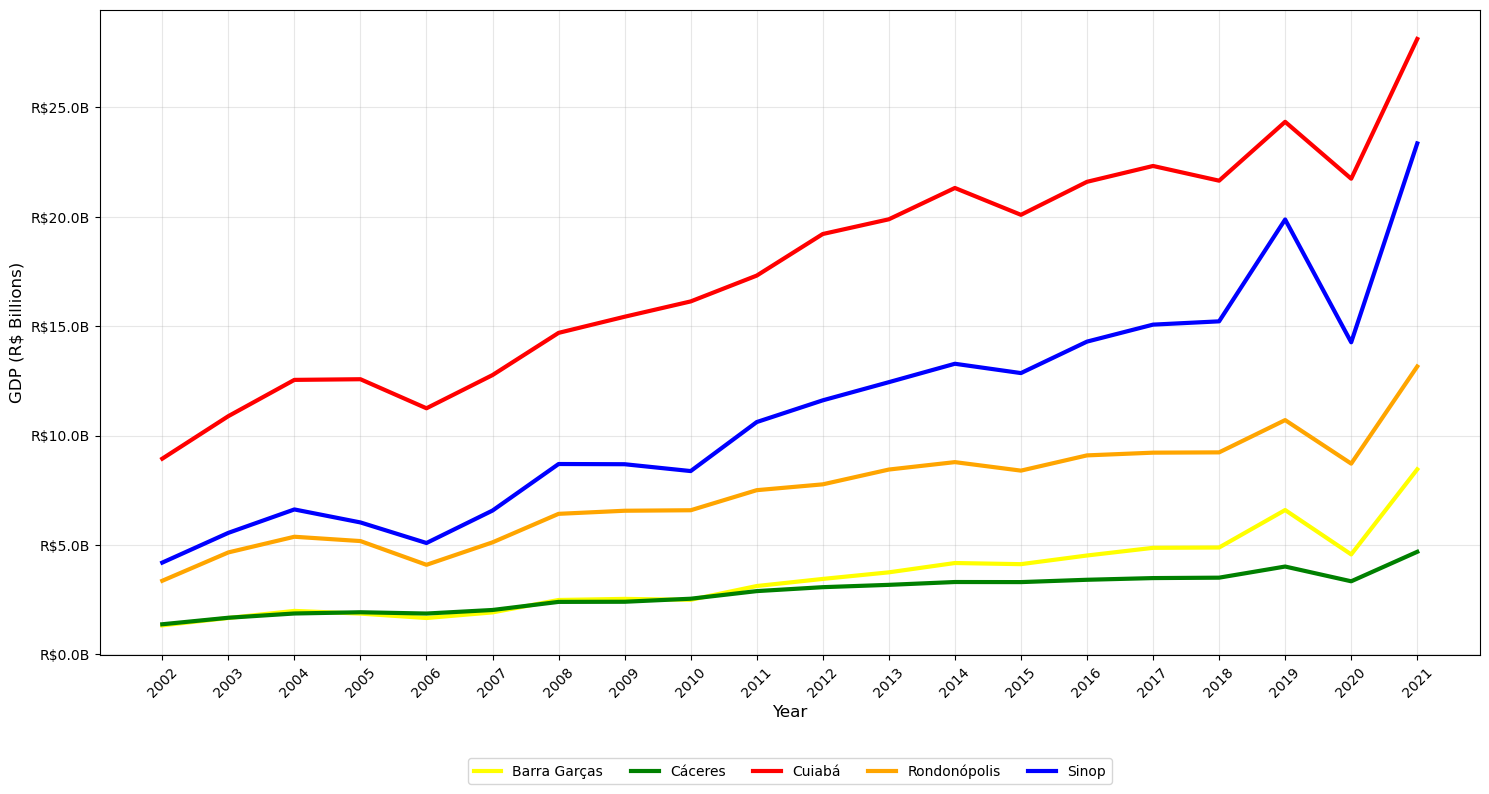

In [4]:
# Define regions and styling
regions = ["Barra do Garças", "Cáceres", "Cuiabá", "Rondonópolis", "Sinop"]
colors = ["yellow", "green", "red", "orange", "blue"]
line_widths = [3, 3, 3, 3, 3]
labels = ["Barra Garças", "Cáceres", "Cuiabá", "Rondonópolis", "Sinop"]

# Set up the figure
plt.figure(figsize=(15, 8))

# Custom formatter for y-axis using billions (accounting for data in 1000R$)
def billions_formatter(x, pos):
    # Since the data is already in 1000R$, we divide by 1e6 to get billions
    # (1000 * 1e6 = 1e9 = 1 billion)
    return f"R${x/1e6:.1f}B"

# Process each region - Plot actual GDP values, not log values
for i, region in enumerate(regions):
    region_data = gdp_data[gdp_data['Intermediate Regions'] == region].copy()
    region_data = region_data[region_data['GDP'] > 0]
    
    plt.plot(region_data['Year'], region_data['GDP'],
             color=colors[i], 
             linewidth=line_widths[i], 
             label=labels[i])

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (R$ Billions)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Get all unique years from the dataset for x-axis ticks
all_years_graph1 = sorted(gdp_data['Year'].unique())
plt.xticks(all_years_graph1, rotation=45 if len(all_years_graph1) > 10 else 0)

# Move legend to bottom of the graph
plt.legend(fontsize=10, ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           frameon=True, framealpha=0.8)

plt.tight_layout()

# Save the plot with adjusted bbox_inches to ensure legend is included
output_path = "C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph1_python.jpg"
plt.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white', pad_inches=0.3)
plt.show()

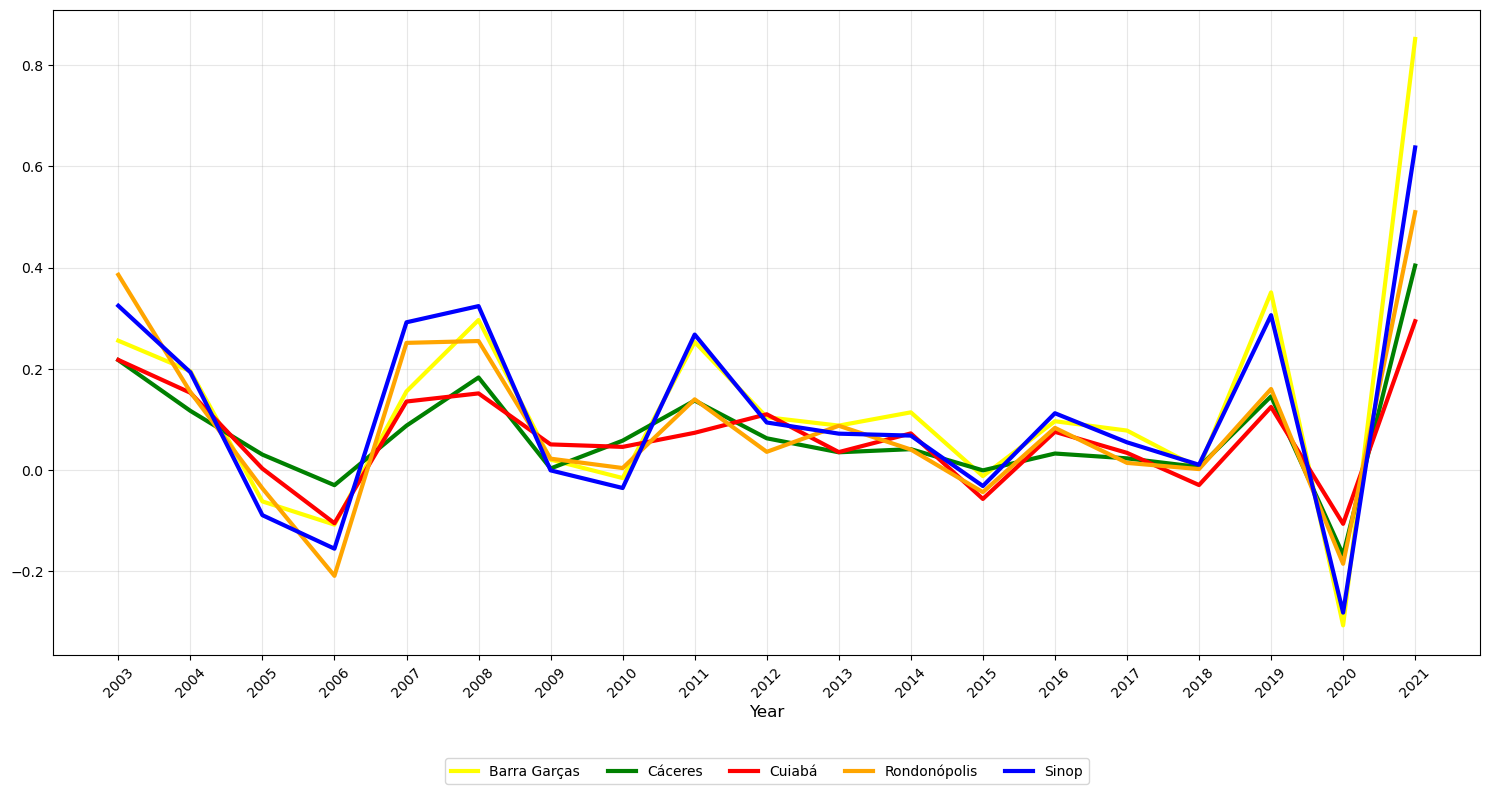

In [5]:
# GDP increase plot (Graph 2)
gdp_inc_data = pd.read_excel(file_path, sheet_name="Graph 2")
plt.figure(figsize=(15, 8))

for i, region in enumerate(regions):
    region_data = gdp_inc_data[gdp_inc_data['Intermediate Regions'] == region]
    plt.plot(region_data['Year'], region_data['GDP increase'],
             color=colors[i], 
             linewidth=line_widths[i], 
             label=labels[i])

# Customize the plot - Show all years on x-axis
plt.xlabel('Year', fontsize=12)
plt.ylabel('')  # Empty string removes y-axis label
plt.grid(True, alpha=0.3)

# Get all unique years from the dataset for x-axis ticks
all_years = sorted(gdp_inc_data['Year'].unique())
plt.xticks(all_years, rotation=45 if len(all_years) > 10 else 0)

# Move legend to bottom of the graph
plt.legend(fontsize=10, ncol=5, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           frameon=True, framealpha=0.8)

plt.tight_layout()

# Save the plot with adjusted bbox_inches to ensure legend is included
output_path = "C:/Users/daves/OneDrive/Pessoal/Acadêmico/Mestrado/Dissertação - Execução/Dissertação/Quadros e gráficos/Graph2_python.jpg"
plt.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white', pad_inches=0.3)
plt.show()

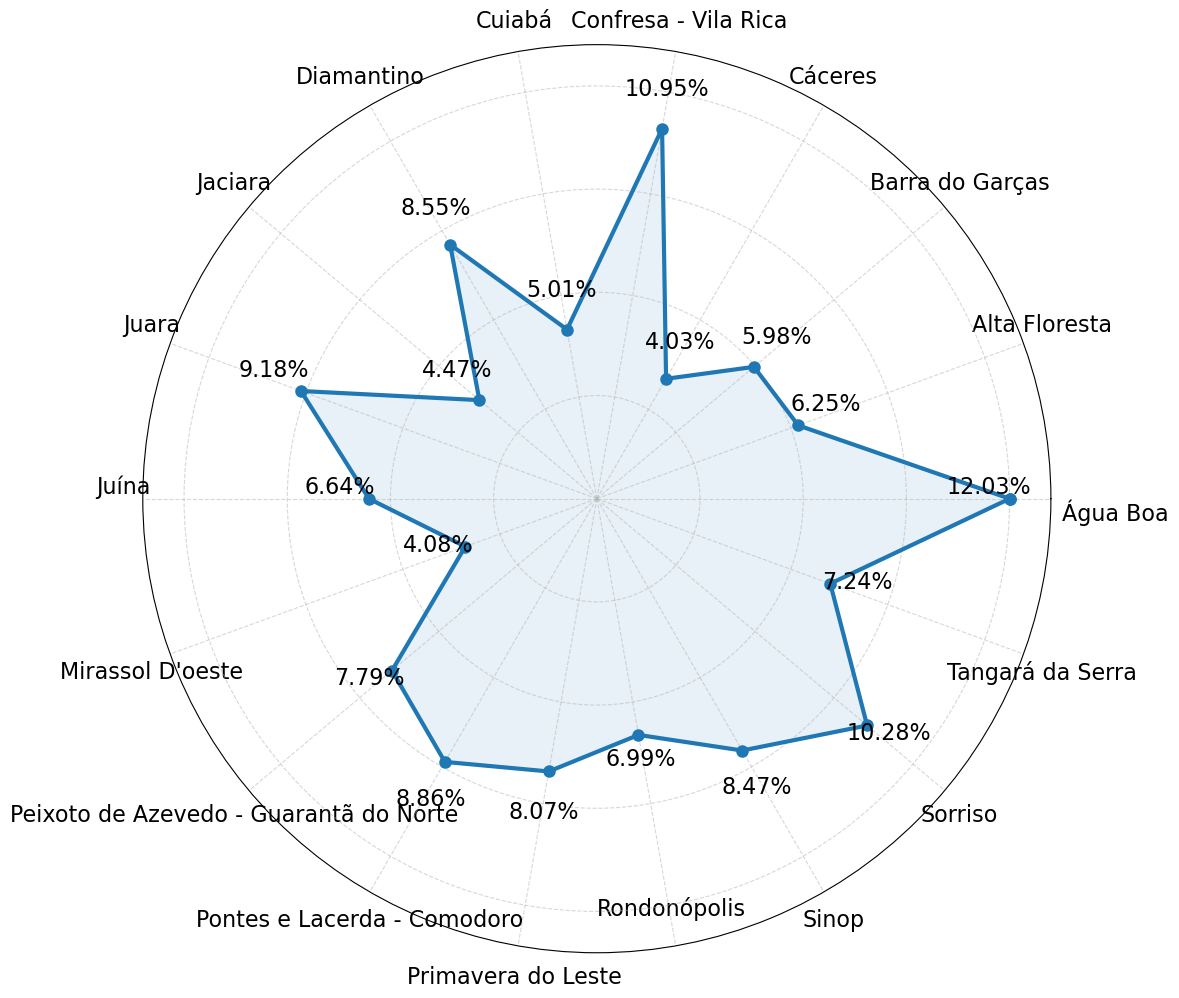

In [22]:
# Load the data from Excel
file_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Graph  12.xlsx"
df = pd.read_excel(file_path, sheet_name='Planilha1')

# Extract the labels and values
labels = df['Imediate Region'].tolist()
values = df['Increase'].tolist()

# Convert values to percentages (if needed)
values = [x * 100 for x in values]

# Number of variables
num_vars = len(labels)

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by repeating the first value
values += values[:1]
angles += angles[:1]

# Initialize the polar plot
plt.rcParams.update({
    'font.size': 16,
    'font.family': 'sans-serif'
}) 
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'polar': True})

# Plot the data
line, = ax.plot(angles, values, 'o-', linewidth=3, markersize=8)
ax.fill(angles, values, alpha=0.1)

# Set the labels for each axis with adjusted padding
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, ha='center', va='center')

# Show radial grid lines but hide their labels
max_value = max(values)
grid_levels = np.linspace(0, max_value, 5)  # Creates 5 concentric circles (including center)
ax.set_yticks(grid_levels)  # Set grid line positions
ax.set_yticklabels([])  # Hide the radial value labels
ax.grid(True, linestyle='--', alpha=0.5)  # Show grid with dashed lines and some transparency

# Set y-axis limits
ax.set_ylim(0, max_value * 1.1)

# Create a dictionary for custom offsets for specific cities
custom_offsets = {
    'Água Boa': -0.05,  # Negative value to lower the label
    'Rondonópolis': 0.03  # Only adjusting Rondonópolis now
}

# Add percentage labels at each point with 2 decimal places
for angle, value, label in zip(angles[:-1], values[:-1], labels):
    # Default offset
    offset = max_value * 0.07
    
    # Apply custom offset if this city needs adjustment
    if label in custom_offsets:
        offset = max_value * custom_offsets[label]
    
    ha = 'center'
    va = 'bottom'
    
    if np.pi/4 < angle < 3*np.pi/4:  # Top regions
        va = 'bottom'
    elif 5*np.pi/4 < angle < 7*np.pi/4:  # Bottom regions
        va = 'top'
    
    ax.text(angle, value + offset, f"{value:.2f}%", 
            ha=ha, va=va, fontsize=16)

# Adjust label positions to prevent overlap
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    current_label = label.get_text()
    
    # Custom rotation and vertical alignment adjustments
    if angle < np.pi/2 or angle > 3*np.pi/2:
        label.set_rotation(np.degrees(angle)-90)
    else:
        label.set_rotation(np.degrees(angle)+90)
    
    # Special adjustments for specific cities
    if current_label == 'Água Boa':
        label.set_va('top')
        label.set_y(-0.1)  # Move the label downward
    elif current_label == 'Rondonópolis':
        label.set_va('bottom')
        label.set_y(0.1)  # Move the label upward
    elif angle > np.pi:
        label.set_va('top')
    else:
        label.set_va('bottom')

# Save the figure
output_path = os.path.join(output_dir, "graph20_radar.png")
plt.savefig(output_path, dpi=1200, bbox_inches='tight', transparent=False)

plt.tight_layout()
plt.show()